**Amitoj Singh, Student id: 300849540**

#Import Libraries and Data

In [30]:
#Import required packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
import matplotlib.pylab as plt
!pip install dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary,gainsChart, liftChart
from dmba.metric import AIC_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus

In [31]:
#upload dataset
survey = pd.read_excel('Amitoj_2_Capstone_dataset.xlsx')
survey.head()

,2 Age,4 Gender,6 Type,8 profit,P average,7 SPECIFY,SA average,SP Average,EE average,N(Af) Av,...,SP Average.1,SUP Average,SM Average,INT aver,ING Av,Ex Average,SG Aver,BIDR AVER,5 Founder,Work_Satisfaction
0,7,1,1,3,3.4,PAINT,3.75,3.000000,0.333333,4.285714,...,5.00,1.0,2.000000,2.2,2.333333,1.333333,3.8,1.0,1,3.857143
1,6,1,2,4,3.2,SPORTS,2.75,2.142857,0.666667,4.714286,...,2.25,2.4,2.857143,4.2,2.333333,1.000000,4.8,2.0,1,3.428571
2,6,2,4,4,1.6,DATA PROCESSNG,3.25,2.285714,1.666667,3.857143,...,4.00,2.6,1.571429,2.0,4.000000,2.333333,1.8,2.2,0,3.000000
3,6,1,1,4,4.0,FOOD,4.00,3.428571,0.000000,4.428571,...,3.75,4.6,3.142857,2.2,5.000000,4.333333,3.4,3.8,1,4.285714
4,7,1,2,5,2.4,FOOD,3.75,2.571429,2.333333,3.428571,...,3.75,4.6,3.142857,2.2,5.000000,4.333333,3.4,3.8,1,4.142857


In [32]:
survey.dtypes

2 Age                  int64
4 Gender               int64
6 Type                 int64
8 profit               int64
P average            float64
7 SPECIFY             object
SA average           float64
SP Average           float64
EE average           float64
N(Af) Av             float64
N(Dom)               float64
N(Ach)               float64
N(Aut)               float64
EO-I                 float64
EO-P                 float64
E0-R                 float64
SP Average.1         float64
SUP Average          float64
SM Average           float64
INT aver             float64
ING Av               float64
Ex Average           float64
SG Aver              float64
BIDR AVER            float64
5 Founder              int64
Work_Satisfaction    float64
dtype: object

In [33]:
survey.columns

Index(['2 Age', '4 Gender', '6 Type', '8 profit', 'P average', '7 SPECIFY',
       'SA average', 'SP Average', 'EE average', 'N(Af) Av', 'N(Dom)',
       'N(Ach)', 'N(Aut)', 'EO-I', 'EO-P', 'E0-R', 'SP Average.1',
       'SUP Average', 'SM Average', 'INT aver', 'ING Av', 'Ex Average',
       'SG Aver', 'BIDR AVER', '5 Founder', 'Work_Satisfaction'],
      dtype='object')

#Data Cleaning

Remove number and space from columns name

In [34]:
survey.columns = survey.columns.str.strip('6 ')
survey.columns = survey.columns.str.strip('4 ')
survey.columns = survey.columns.str.strip('5 ')
survey.columns = survey.columns.str.strip('2 ')
survey.columns = survey.columns.str.strip('8 ')
survey.columns = survey.columns.str.strip('7 ')
survey.columns = survey.columns.str.replace(' ', '_')
survey.columns

Index(['Age', 'Gender', 'Type', 'profit', 'P_average', 'SPECIFY', 'SA_average',
       'SP_Average', 'EE_average', 'N(Af)_Av', 'N(Dom)', 'N(Ach)', 'N(Aut)',
       'EO-I', 'EO-P', 'E0-R', 'SP_Average.1', 'SUP_Average', 'SM_Average',
       'INT_aver', 'ING_Av', 'Ex_Average', 'SG_Aver', 'BIDR_AVER', 'Founder',
       'Work_Satisfaction'],
      dtype='object')

#Data Exploration

In [35]:
print(survey.describe())
print(survey.dtypes.value_counts())

              Age      Gender        Type      profit   P_average  SA_average  \
count  420.000000  420.000000  420.000000  420.000000  420.000000  420.000000   
mean     5.742857    1.142857    1.628571    4.142857    2.657143    3.414286   
std      1.828068    0.350344    1.149927    0.990924    0.905128    0.607067   
min      2.000000    1.000000    1.000000    1.000000    0.800000    2.000000   
25%      5.000000    1.000000    1.000000    4.000000    2.200000    3.000000   
50%      5.000000    1.000000    1.000000    4.000000    2.800000    3.500000   
75%      7.000000    1.000000    2.000000    5.000000    3.400000    4.000000   
max      9.000000    2.000000    4.000000    5.000000    4.000000    4.000000   

       SP_Average  EE_average    N(Af)_Av      N(Dom)  ...  SP_Average.1  \
count  420.000000  420.000000  420.000000  420.000000  ...    420.000000   
mean     3.016327    1.647619    3.812245    4.188228  ...      3.405952   
std      0.588995    1.300983    0.768153 

As these are ordinal values, hence, we will not consider any skewness or ketosis (King et al., 2011)

In [36]:
# Any missing value in dataset
survey.isnull().sum()

Age                  0
Gender               0
Type                 0
profit               0
P_average            0
SPECIFY              0
SA_average           0
SP_Average           0
EE_average           0
N(Af)_Av             0
N(Dom)               0
N(Ach)               0
N(Aut)               0
EO-I                 0
EO-P                 0
E0-R                 0
SP_Average.1         0
SUP_Average          0
SM_Average           0
INT_aver             0
ING_Av               0
Ex_Average           0
SG_Aver              0
BIDR_AVER            0
Founder              0
Work_Satisfaction    0
dtype: int64

*This dataset is very clean with no missing values and outliers*

**Correlation analysis**

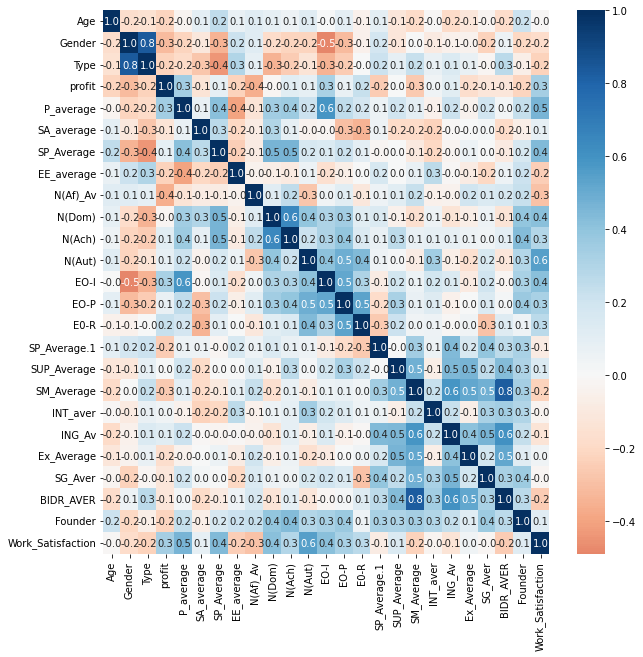

In [37]:
#Correlation of survey datset
corr = survey.corr().round(2)
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

No Strong correlation has been found between input variables**



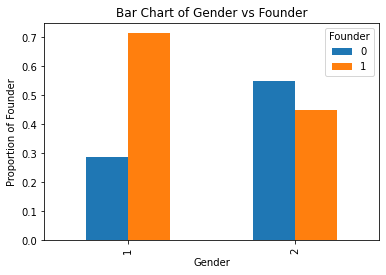

In [38]:
table=pd.crosstab(survey.Gender, survey.Founder)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.title('Bar Chart of Gender vs Founder')
plt.xlabel('Gender')
plt.ylabel('Proportion of Founder')
plt.savefig('Gender vs Founder')

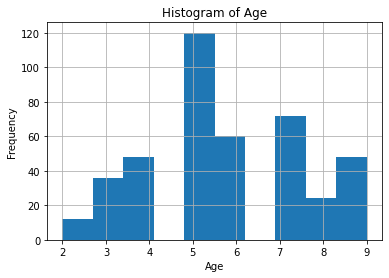

In [39]:
survey.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

#Modelling

#Decision Tree

In [40]:
#Decision Tree Regressor for predicting the profit
from sklearn.tree import DecisionTreeRegressor
excludecolumn= 'SPECIFY','profit','Founder'
outcome = 'profit'
predictors = [s for s in survey.columns if s not in excludecolumn]
X = survey[predictors]
y = survey[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=111)
# user grid search to find optimized tree
param_grid = {'max_depth': [5, 10, 15, 20, 25],
'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
'min_samples_split': [10, 20, 30, 40, 50],
} 
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1,)
regressor = gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008],
'min_samples_split': [14, 15, 16, 18, 20],
} 
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
regressor = gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)
regTree = gridSearch.best_estimator_
regressionSummary(train_y, regTree.predict(train_X))
regressionSummary(valid_y, regTree.predict(valid_X))

Initial parameters:  {'max_depth': 20, 'min_impurity_decrease': 0, 'min_samples_split': 10}
Improved parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.002, 'min_samples_split': 14}

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.1564
            Mean Absolute Error (MAE) : 0.0489
          Mean Percentage Error (MPE) : -0.1223
Mean Absolute Percentage Error (MAPE) : 1.1006

Regression statistics

                      Mean Error (ME) : 0.0216
       Root Mean Squared Error (RMSE) : 0.1749
            Mean Absolute Error (MAE) : 0.0649
          Mean Percentage Error (MPE) : 0.3239
Mean Absolute Percentage Error (MAPE) : 1.4070


In [41]:
#R-Square
r2_score(valid_y, regTree.predict(valid_X))

0.9586462128374353

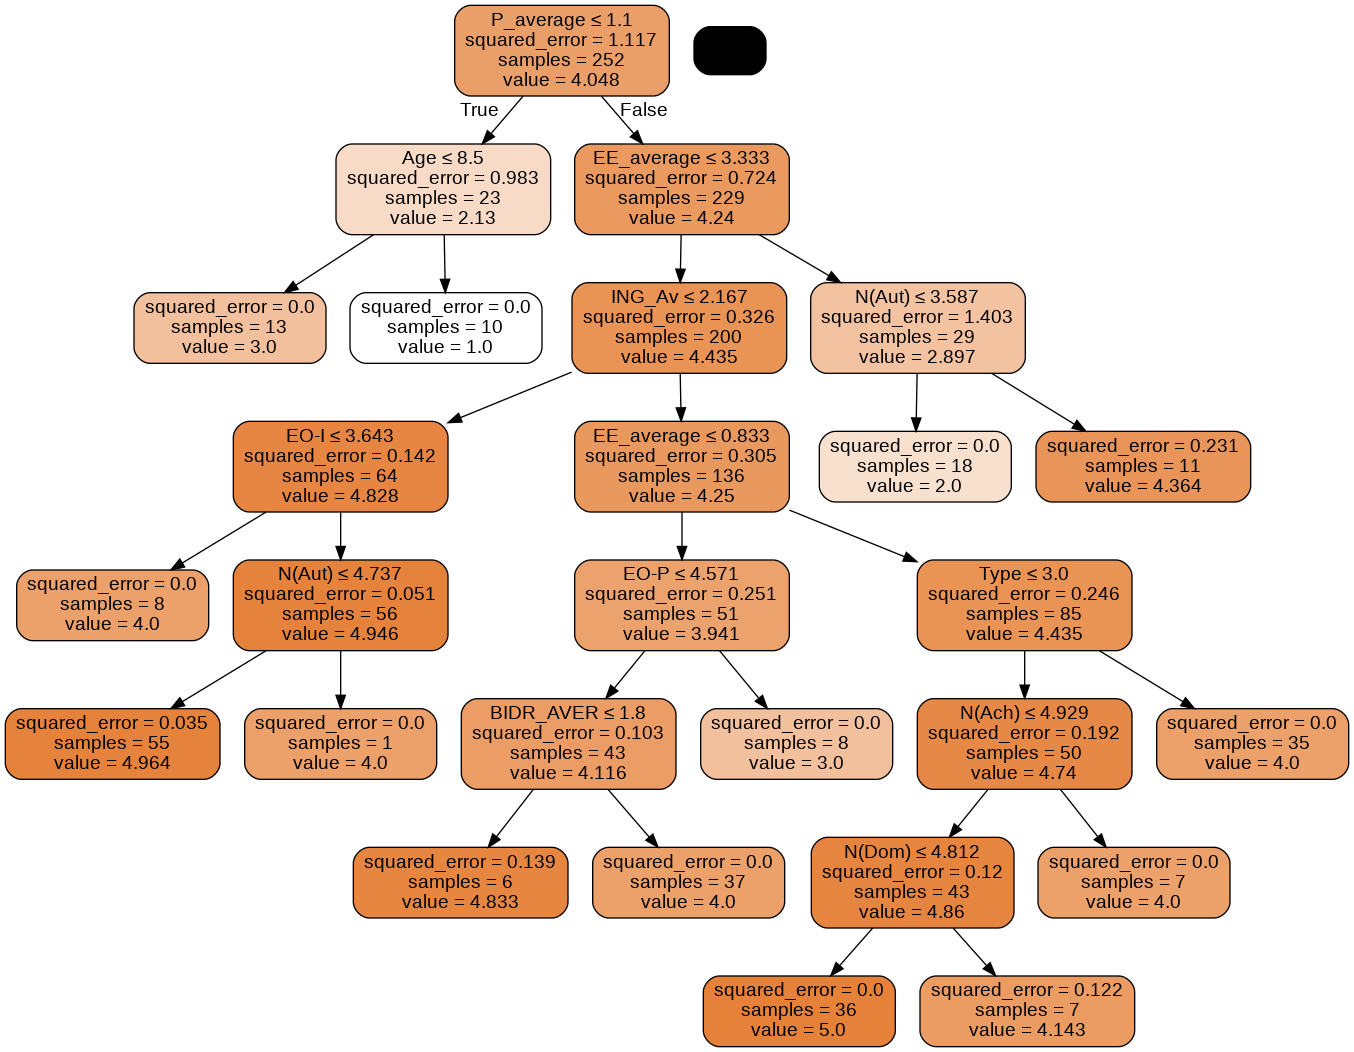

In [42]:
#Classification Tree
dot_data1 = StringIO()
export_graphviz(regTree, out_file=dot_data1,  
                filled=True, rounded=True,
                special_characters=True,feature_names = train_X.columns)
graph1 = pydotplus.graph_from_dot_data(dot_data1.getvalue())  
graph1.write_png('survey_reg.png')
Image(graph1.create_png())

This model is slightly overfitted as RMSE value of training data is slightly lower than the validation data

In [43]:
#Decision tree classifier model for classifying the founder
from sklearn.tree import DecisionTreeClassifier
excludecolumn_c= 'SPECIFY','Founder','profit'
outcome_c = 'Founder'
predictors_c = [s for s in survey.columns if s not in excludecolumn_c]
X_c = survey[predictors_c]
y_c = survey[outcome_c]
train_X_c, valid_X_c, train_y_c, valid_y_c = train_test_split(X_c, y_c, test_size=0.4, random_state=111)
# user grid search to find optimized tree
param_grid_c = {'max_depth': [5, 10, 15, 20, 25],
'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
'min_samples_split': [10, 20, 30, 40, 50],
}
gridSearch_c = GridSearchCV(DecisionTreeClassifier(), param_grid_c, cv=5, n_jobs=-1)
classifier = gridSearch_c.fit(train_X_c, train_y_c)
print('Initial parameters: ', gridSearch.best_params_)
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008],
'min_samples_split': [14, 15, 16, 18, 20]
} 
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, n_jobs=-1,)
classifier = gridSearch.fit(train_X_c, train_y_c)
print('Improved parameters: ', gridSearch.best_params_)
clasTree = gridSearch.best_estimator_
print(clasTree)
classificationSummary(train_y_c, clasTree.predict(train_X_c))
classificationSummary(valid_y_c, clasTree.predict(valid_X_c))

Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.002, 'min_samples_split': 14}
Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0.005, 'min_samples_split': 16}
DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.005,
                       min_samples_split=16)
Confusion Matrix (Accuracy 0.9167)

       Prediction
Actual   0   1
     0  77   9
     1  12 154
Confusion Matrix (Accuracy 0.9345)

       Prediction
Actual   0   1
     0  44   6
     1   5 113


In [44]:
#Precision Score, Recall Score, F1 Score
from sklearn.metrics import precision_score, recall_score, f1_score
pred_y_c = clasTree.predict(valid_X_c)
print("Accuracy:",metrics.accuracy_score(valid_y_c, pred_y_c))
print("Precision:",metrics.precision_score(valid_y_c, pred_y_c, average="binary"))
print("Recall:",metrics.recall_score(valid_y_c, pred_y_c, average="binary"))
print("F1 Score:",metrics.f1_score(valid_y_c, pred_y_c, average="binary"))

Accuracy: 0.9345238095238095
Precision: 0.9495798319327731
Recall: 0.9576271186440678
F1 Score: 0.9535864978902954


In [45]:
#Confusion matrix
from sklearn.metrics import  confusion_matrix
cm1 = confusion_matrix(valid_y_c, pred_y_c)
print("Confusion matrix:")
print(cm1)
tn = cm1[0][0]
fp = cm1[0][1]
fn = cm1[1][0]
tp = cm1[1][1]
print("Total number of true positives", tp)
print("Total number of false negatives",fn)
print("Total number of false positives",fp)
print("Total number of true negatives",tn)
acc=float(tp+tn)/(tp+tn+fp+fn)
print('Classifier Accuracy: %.2f%%' % (acc * 100))
tpr = float(tp)/(tp+fn)
print('True Positive Rate (TPR/Recall/Sensitivity): %.2f%%' % (tpr * 100))
specificity = float (tn)/(tn+fp)
print ("True Negative Rate (TNR/Specificity/selectivity):%.2f%%" % (specificity*100)) 
fpr = float(fp)/(fp+tn)
print("False Positive Rate (FPR): %.2f%%" % (fpr * 100))
fnr = fn/ (fn+ tp)
print("False Negative Rate (FNR): %.2f%%" % (fnr*100))
precision=float(tp)/(tp+fp)
print("Precision/Positive Predictive value:%.2f%%" %(precision*100))
fScore = 2*((precision*tpr)/(precision+tpr))
print("F1-Score: %.2f%%" %(fScore*100))

Confusion matrix:
[[ 44   6]
 [  5 113]]
Total number of true positives 113
Total number of false negatives 5
Total number of false positives 6
Total number of true negatives 44
Classifier Accuracy: 93.45%
True Positive Rate (TPR/Recall/Sensitivity): 95.76%
True Negative Rate (TNR/Specificity/selectivity):88.00%
False Positive Rate (FPR): 12.00%
False Negative Rate (FNR): 4.24%
Precision/Positive Predictive value:94.96%
F1-Score: 95.36%


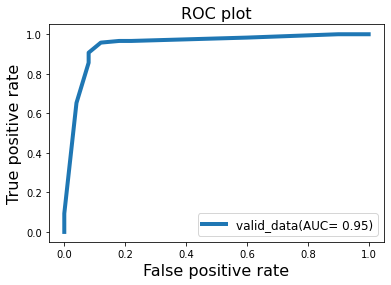

In [46]:
#calculate probabilities for founder 
y_pred_proba = clasTree.predict_proba(valid_X_c)[::,1]

# calculate tpr and fpr values
fpr1, tpr1, _ = metrics.roc_curve(valid_y_c, y_pred_proba) 

#calculate auc value
auc = metrics.roc_auc_score(valid_y_c, y_pred_proba) 

#plot ROC curve
plt.plot(fpr1,tpr1,label="valid_data(AUC= %0.2f)" % auc, linewidth = 4)
#set the legend properties
plt.legend(prop={'size':12},loc='lower right') 
plt.title('ROC plot',fontsize = 16)
plt.xlabel('False positive rate', fontsize = 16)
plt.ylabel('True positive rate', fontsize = 16)
plt.show() #display the plot

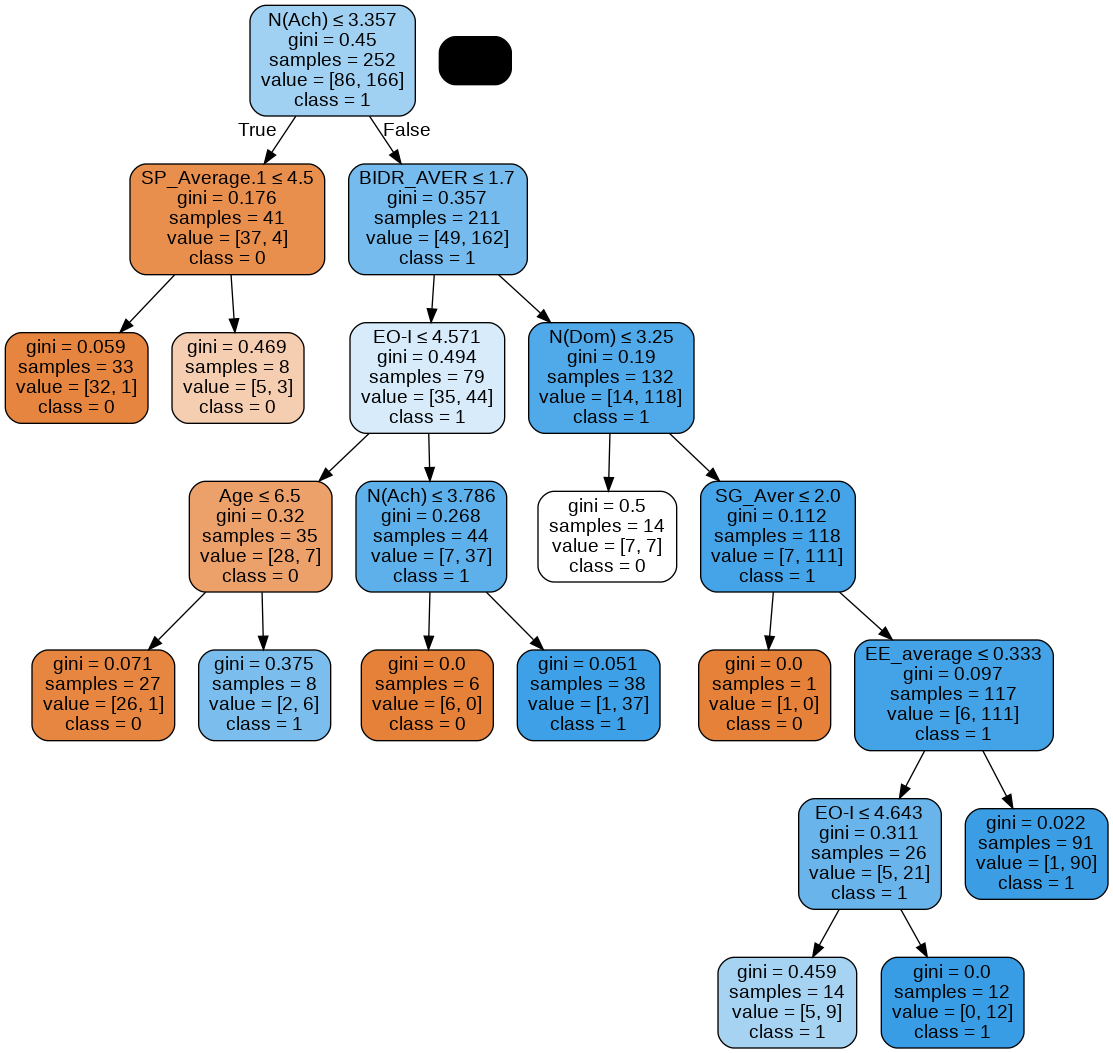

In [47]:
#Classification tree
dot_data = StringIO()
export_graphviz(clasTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = valid_X_c.columns, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('survey.png')
Image(graph.create_png())

This decison tree classifier model is slightly underfitted model, because accuracy for training data is lower than the validation data

#Logistic Regression

SMOTE: SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that we supply as input.

In [48]:
survey_l3 = survey.drop(columns=['profit','SPECIFY','Type'])
X_l3 = survey_l3.loc[:, survey_l3.columns != 'Founder']
y_l3 = survey_l3.loc[:, survey_l3.columns == 'Founder']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_l3_train, X_l3_valid, y_l3_train, y_l3_valid = train_test_split(X_l3, y_l3, test_size=0.4, random_state=111)
columns = X_l3_train.columns
os_data_lX,os_data_ly=os.fit_resample(X_l3_train, y_l3_train)
os_data_lX = pd.DataFrame(data=os_data_lX,columns=columns )
os_data_ly= pd.DataFrame(data=os_data_ly, columns=['Founder'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_lX))
print("Number of non founder in oversampled data",len(os_data_ly[os_data_ly['Founder']==0]))
print("Number of founder",len(os_data_ly[os_data_ly['Founder']==1]))
print("Proportion of no founder data in oversampled data is ",len(os_data_ly[os_data_ly['Founder']==0])/len(os_data_lX))
print("Proportion of founder data in oversampled data is ",len(os_data_ly[os_data_ly['Founder']==1])/len(os_data_lX))

length of oversampled data is  332
Number of non founder in oversampled data 166
Number of founder 166
Proportion of no founder data in oversampled data is  0.5
Proportion of founder data in oversampled data is  0.5


In [50]:
os_data_lX.columns

Index(['Age', 'Gender', 'P_average', 'SA_average', 'SP_Average', 'EE_average',
       'N(Af)_Av', 'N(Dom)', 'N(Ach)', 'N(Aut)', 'EO-I', 'EO-P', 'E0-R',
       'SP_Average.1', 'SUP_Average', 'SM_Average', 'INT_aver', 'ING_Av',
       'Ex_Average', 'SG_Aver', 'BIDR_AVER', 'Work_Satisfaction'],
      dtype='object')

In [28]:
import statsmodels.api as sm
logit_model=sm.Logit(y_l3,X_l3)
result=logit_model.fit(maxiter=500,method='lbfgs')
print(result.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.529     
Dependent Variable: Founder          AIC:              293.0654  
Date:               2022-05-11 18:49 BIC:              381.9510  
No. Observations:   420              Log-Likelihood:   -124.53   
Df Model:           21               LL-Null:          -264.48   
Df Residuals:       398              LLR p-value:      3.8495e-47
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     125.0000                                     
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Age                0.9360   0.2094  4.4701 0.0000  0.5256  1.3464
Gender            -4.2657   0.8735 -4.8838 0.0000 -5.9777 -2.5538
P_average          1.3476   0.5264  2.5601 0.0105  0.3159  2.3794
SA_average        -2.0434   0.6131 -

In [49]:
from sklearn.feature_selection import RFE
data_final_vars1=survey_l3.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars1 if i not in y]
logreg1 = LogisticRegression(max_iter=500)
rfe1 = RFE(logreg1)
rfe1 = rfe1.fit(os_data_lX,os_data_ly.values.ravel())
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True False  True False  True False  True  True  True  True  True
 False False False  True False False False  True False False]
[ 1  1  9  1  6  1  8  1  1  1  1  1 12  3  5  1 10  4 11  1  2  7]


In [29]:
col_ls=['Age','Gender','SA_average','EE_average','N(Dom)','N(Ach)', 'N(Aut)','EO-I','EO-P','SM_Average', 'SG_Aver']
X_Z=os_data_lX[col_ls]
y_Z=os_data_ly['Founder']
logit_model=sm.Logit(y_Z,X_Z)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.336389
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.515     
Dependent Variable: Founder          AIC:              245.3620  
Date:               2022-05-11 19:11 BIC:              287.2185  
No. Observations:   332              Log-Likelihood:   -111.68   
Df Model:           10               LL-Null:          -230.12   
Df Residuals:       321              LLR p-value:      3.0840e-45
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age            0.6433    0.1292   4.9776  0.0000   0.3900   0.8966
Gender        -3.3756    0.6424  -5.2547  0.0000  -4.6347  -2.

In [51]:
cols_final = ['Age','Gender','SA_average','EE_average','N(Dom)', 'N(Aut)','EO-P','SM_Average', 'SG_Aver']
X_final=os_data_lX[cols_final]
y_final=os_data_ly['Founder']
logit_model=sm.Logit(y_final,X_final)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.336753
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.514     
Dependent Variable: Founder          AIC:              241.6041  
Date:               2022-05-11 19:26 BIC:              275.8503  
No. Observations:   332              Log-Likelihood:   -111.80   
Df Model:           8                LL-Null:          -230.12   
Df Residuals:       323              LLR p-value:      1.1619e-46
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age            0.6354    0.1284   4.9498  0.0000   0.3838   0.8871
Gender        -3.3814    0.5594  -6.0445  0.0000  -4.4779  -2.

In [52]:
#Claculating Odd ratios from the coef.
import math
print("Age_odd_ratios:",  math.exp(0.6354))
print("Gender_odd_ratios:", math.exp(-3.3814))
print("SA_average_odd_ratios:", math.exp(-3.3203))
print("EE_average_odd_ratios:", math.exp(1.2488))
print("N(Dom)_odd_ratios:", math.exp(3.1860))
print("N(Aut)_odd_ratios:", math.exp(-0.9288))
print("EO-P_odd_ratios:", math.exp(-1.2853))
print("SM_average_odd_ratios:", math.exp(1.2908))
print("SG_Aver_odd_ratios:", math.exp(1.1119))

Age_odd_ratios: 1.8877771012972229
Gender_odd_ratios: 0.03399982164891095
SA_average_odd_ratios: 0.03614198753123496
EE_average_odd_ratios: 3.486157057954899
N(Dom)_odd_ratios: 24.191467781924032
N(Aut)_odd_ratios: 0.3950274590163841
EO-P_odd_ratios: 0.27656760090491517
SM_average_odd_ratios: 3.6356939477991688
SG_Aver_odd_ratios: 3.0401291558724313


In [53]:
#Fit logistic regression model
train_X_final, valid_X_final, train_y_final, valid_y_final = train_test_split(X_final, y_final, test_size=0.4, random_state=111)
logit_reg_final = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
result_final = logit_reg_final.fit(train_X_final, train_y_final)

In [54]:
#Make prediction and find probability
logit_reg_pred_final = logit_reg_final.predict(valid_X_final)
logit_reg_proba_final = logit_reg_final.predict_proba(valid_X_final)
logit_result_final = pd.DataFrame({'actual': valid_y_final,
'p(0)': [p[0] for p in logit_reg_proba_final],
'p(1)': [p[1] for p in logit_reg_proba_final],
'predicted': logit_reg_pred_final})
print(logit_result_final)

     actual      p(0)      p(1)  predicted
145       1  0.129878  0.870122          1
15        1  0.028506  0.971494          1
279       0  0.988001  0.011999          0
146       0  0.995305  0.004695          0
133       1  0.829811  0.170189          0
..      ...       ...       ...        ...
44        1  0.000600  0.999400          1
151       1  0.000600  0.999400          1
225       0  0.998999  0.001001          0
211       0  0.522404  0.477596          0
140       0  0.979275  0.020725          0

[133 rows x 4 columns]


In [55]:
#training confusion matrix
classificationSummary(train_y_final, logit_reg_final.predict(train_X_final))
# validation confusion matrix
classificationSummary(valid_y_final, logit_reg_final.predict(valid_X_final))

Confusion Matrix (Accuracy 0.8744)

       Prediction
Actual  0  1
     0 93 13
     1 12 81
Confusion Matrix (Accuracy 0.8722)

       Prediction
Actual  0  1
     0 58  2
     1 15 58


In [56]:
#Accuracy, Precision, Recall, F1 Score
from sklearn.metrics import precision_score, recall_score, f1_score
print("Accuracy:",metrics.accuracy_score(valid_y_final, logit_reg_final.predict(valid_X_final)))
print("Precision:",metrics.precision_score(valid_y_final, logit_reg_final.predict(valid_X_final), average="binary"))
print("Recall:",metrics.recall_score(valid_y_final, logit_reg_final.predict(valid_X_final), average="binary"))
print("F1 Score:",metrics.f1_score(valid_y_final, logit_reg_final.predict(valid_X_final), average="binary"))

Accuracy: 0.8721804511278195
Precision: 0.9666666666666667
Recall: 0.7945205479452054
F1 Score: 0.8721804511278196


In [57]:
#Confusion matrix, True Positive Rate, False Positive Rate, False Positive Rate and False Negative Rate
from sklearn.metrics import  confusion_matrix
cm_logit = confusion_matrix(valid_y_final, logit_reg_final.predict(valid_X_final))
print("Confusion matrix:")
print(cm_logit)
tn_lg = cm_logit[0][0]
fp_lg = cm_logit[0][1]
fn_lg = cm_logit[1][0]
tp_lg = cm_logit[1][1]
print("Total number of true positives", tp_lg)
print("Total number of false negatives",fn_lg)
print("Total number of false positives",fp_lg)
print("Total number of true negatives",tn_lg)
acc_lg=float(tp_lg+tn_lg)/(tp_lg+tn_lg+fp_lg+fn_lg)
print('Classifier Accuracy: %.2f%%' % (acc_lg * 100))
tpr_lg = float(tp_lg)/(tp_lg+fn_lg)
print('True Positive Rate (TPR/Recall/Sensitivity): %.2f%%' % (tpr_lg * 100))
specificity_lg = float (tn_lg)/(tn_lg+fp_lg)
print ("True Negative Rate (TNR/Specificity/selectivity):%.2f%%" % (specificity_lg*100)) 
fpr_lg = float(fp_lg)/(fp_lg+tn_lg)
print("False Positive Rate (FPR): %.2f%%" % (fpr_lg * 100))
fnr_lg = fn_lg/ (fn_lg+ tp_lg)
print("False Negative Rate (FNR): %.2f%%" % (fnr_lg*100))
precision_lg=float(tp_lg)/(tp_lg+fp_lg)
print("Precision/Positive Predictive value:%.2f%%" %(precision_lg*100))
fScore_lg = 2*((precision_lg*tpr_lg)/(precision_lg+tpr_lg))
print("F1-Score: %.2f%%" %(fScore_lg*100))

Confusion matrix:
[[58  2]
 [15 58]]
Total number of true positives 58
Total number of false negatives 15
Total number of false positives 2
Total number of true negatives 58
Classifier Accuracy: 87.22%
True Positive Rate (TPR/Recall/Sensitivity): 79.45%
True Negative Rate (TNR/Specificity/selectivity):96.67%
False Positive Rate (FPR): 3.33%
False Negative Rate (FNR): 20.55%
Precision/Positive Predictive value:96.67%
F1-Score: 87.22%


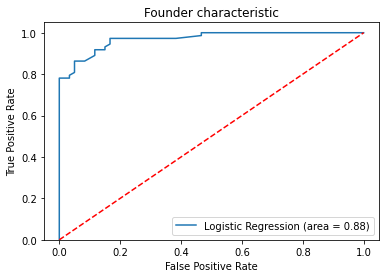

In [58]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc1 = roc_auc_score(valid_y_final, logit_reg_final.predict(valid_X_final))
fpr_lg, tpr_lg, thresholds = roc_curve(valid_y_final, logit_reg_final.predict_proba(valid_X_final)[:,1])
plt.figure()
plt.plot(fpr_lg, tpr_lg, label='Logistic Regression (area = %0.2f)' % logit_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim()
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Founder characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC1')
plt.show()

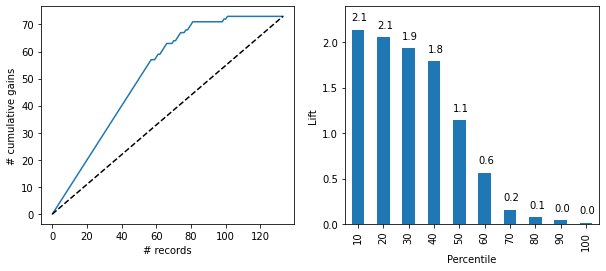

In [59]:
#Cumulative gains and Lift chart
df_final = logit_result_final.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df_final.actual, ax=axes[0])
liftChart(df_final['p(1)'], title=False, ax=axes[1])
plt.show()

**Mean value of selected variables**

In [60]:
Logistic_result = survey[{'Age','Gender','SA_average','EE_average','N(Dom)', 'N(Aut)','EO-P','SM_Average', 'SG_Aver','Founder'}]
Standard = Logistic_result.groupby('Founder').mean()
print(Standard)
Standard.to_excel("output.xlsx") 

             EO-P    N(Aut)       Age  EE_average  SM_Average  SA_average  \
Founder                                                                     
0        3.646008  3.579963  5.161765    1.242647    1.776261    3.476103   
1        4.018612  4.024032  6.021127    1.841549    2.374748    3.384683   

          SG_Aver    N(Dom)    Gender  
Founder                                
0        2.711765  3.801164  1.242647  
1        3.439437  4.373582  1.095070  


**Industry-wise mean value of selected variables**

In [61]:
Logistic_result1 = survey[{'Age','Gender','SA_average','EE_average','N(Dom)', 'N(Aut)','EO-P','SM_Average', 'SG_Aver','SPECIFY'}]
industrial_standard = Logistic_result1.groupby('SPECIFY').mean()
print(industrial_standard)
industrial_standard.to_excel("output2.xlsx")

                         EO-P    N(Aut)       Age  EE_average  SM_Average  \
SPECIFY                                                                     
AUTOMOBILE           4.428571  4.137500  3.000000    1.000000    1.261905   
BRAND BUILDING       4.142857  4.054167  5.000000    2.000000    4.595238   
CARRIAGES            3.714286  3.725000  6.000000    1.333333    2.011905   
DATA PROCESSNG       3.142857  2.258333  6.000000    1.666667    1.571429   
FABRICS              3.571429  3.329167  9.000000    1.666667    2.142857   
FOOD                 3.828571  3.739167  5.600000    1.600000    2.226190   
FORESTRY             3.714286  4.568750  5.000000    3.000000    2.119048   
FURNITURE            4.714286  4.983333  7.000000    2.666667    2.571429   
HEALTH               3.642857  3.241667  4.000000    1.833333    3.000000   
LEATHER              3.571429  2.708333  5.000000    1.666667    3.023810   
MACHINERY            3.857143  4.812500  4.000000    0.000000    2.190476   